In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# plt.rc('xtick', labelsize=25) 
# plt.rc('ytick', labelsize=25) 
# plt.rc('legend', fontsize=15)
# fontsize_ylabel=20
# fontsize_xlabel=20
# fontsize_title=30
plt.style.use('ggplot')
from brokenaxes import brokenaxes
sys.path.insert(0, '../../')
import useful_functions as uf

In [2]:
#Here I am trying a function that performs a vertical cut on the axis for plotting, using the example below
def plot_tot_results(data, title, hline=True, vertical_break=False):
    """This function visualizes the results of language normalization as bar plots
     """
    fig = plt.figure(figsize=(10, 5))
    baxes = brokenaxes(ylims=((0,1.5e5),(4.5e6,5e6)), hspace=0.3)
    baxes.set_title(f"{title}",fontsize=20)
    baxes.set_ylabel(f'# tagged metafields', fontsize=20 )
    if hline:
        baxes.hlines(1e5, -1, 100,color='black',lw=3, label='100000 fields')
    baxes.bar(data.index,data.diff_nr_literals)
    baxes.legend(loc='best',fontsize=20)
    return None

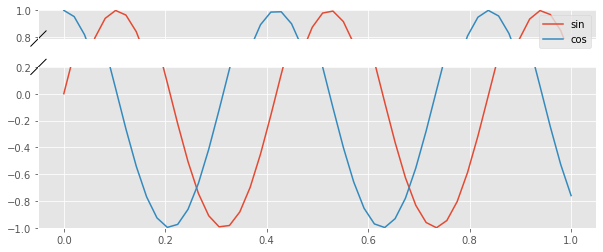

In [3]:
fig = plt.figure(figsize=(10,4))
baxes = brokenaxes(ylims=((-1,.2),(0.79,1)), hspace=0.3)
x = np.linspace(0,1,50)
baxes.plot(x,np.sin(15*x),label="sin")
baxes.plot(x,np.cos(15*x),label="cos")
baxes.legend(loc="best")
plt.show()

# Analysis normalization of language tags for Europeana Translate

The goal of this notebook is to measure the amount of available data gained from normalizing the language tags of a recent (June2022) Europeana Data dump.
More info is in this [document](https://docs.google.com/document/d/14hc1gOjezsegSg3vG1yHk0gC5qxzjtPHU1KLyKgmn7U/edit#).

In [4]:
def data_fit(file,column_title,head):
    '''This function  manipulates the statistical sheets produced by NTUA downloades as csv files
    for analysis and visualization'''
    data_lang_tags=pd.read_csv(file,sep=',',header=head,low_memory=False)
    data_lang_tags=data_lang_tags.transpose()
    data_lang_tags_1=data_lang_tags[[0]]
    data_lang_tags_2=data_lang_tags_1.iloc[3:,:]
    data_lang_tags_3=data_lang_tags_2.rename(columns={0:f"{column_title}"})
    return data_lang_tags_3

# Data import

The data imported below are extracted from the statistical sheets  [here](https://docs.google.com/spreadsheets/d/1DVJip_Uk47d8HxmiUfcT5DOqfksQoU2IckjNi7nOp1I/edit#gid=127215813)  (normalized data dump) and [here](https://docs.google.com/spreadsheets/d/1tBms0NfEWGwnMbmrofD4VZwhXte7y7Ls1wy3Fdc-wVc/edit#gid=17990917) (not normalized data dump).
The data are downloaded as csv files from google sheet and further structured for analysis and visualization.

In [5]:
file_lang_tag='lang_tags.csv'
file_lang_tag_norm='lang_tags_normalized.csv'

In [6]:
data_not_norm=pd.read_csv(file_lang_tag,low_memory=False,header=1)
data_norm=pd.read_csv(file_lang_tag_norm,low_memory=False,header=0)

In [7]:
data_not_norm.head(2)

,CollectionId,Source,Count,xx,es,en,nl,pl,da,sr,sk,de,sl,IT,it,fr,el,ro,eng,la,sv,sw,lt,deu,hu,cs,mul,und,grc,IS,fin,pt,ca,ru,et,uk,bg,ltn,fln,zxx,est,gr,fa,lv,pol,RS,DE,RU,EN,PL,hun,fi,hi,bn,ka,id,ur,ko,ta,zh,ar,vi,th,ja,tl,he,tr,gl,no,tw,lu,wa,br,si,kg,ie,sq,mk,ee,ch,is,ba,li,aut,be,hr,fra,ell,ita,lat,elen,NOR,tir,gez,epo,spa,sla,nor,rus,ara,por,oci,ger,fre,gre,slo,ukr,dut,isl,mkd,roh,gsw,ice,rum,den,mac,cze,geo,dan,tur,yid,lva,alb,lit,ire,ltg,lav,svn,ltu,hrv,mdl,bul,slv,mmm,syr,sa,yi,hy,oc,frd,ota,frm,fro,km,grm,alt,co,pro,eu,te,su,rm,cu,ha,af,slk,nn,jp,nb,cz,ces,srp,xxx,gd,sco,Skulptur,Tegning,Maleri,eo,akk,gmh,bo,bra,rom,arc,egy,mehrspr,pra,new,urd,awa,ne,pi,sonst,nds,swe,dit,nee,vie,arm,chi,jpn,cop,esx,ms,cy,cy-GB,ga,SI,nl-nl,en-gb,freeng,engfre,per,nl-NL,en-GB,goh,rue,ang,kk,mn,ky,az,nld,LA,FR,NL,se,cas,peo,na,bre,el,vrt,sk-SK,sk-sk,en-nl,en-da,en-it,fr-en,en-el,en-pl,en-es,en-sl,en-de,en-sw,en-lt,en-ro,en-eng,en-sv,en-pt,en-hu,en-ca,en-und,en-ru,en-la,en-et,en-fa,en-PL,en-hi,en-fi,en-bn,en-ka,en-id,en-ur,en-ko,en-ta,en-zh,en-cs,en-ar,en-vi,en-th,en-ja,en-tl,en-he,en-tr,en-li,en-aut,en-uk,en-sk,en-lv,en-sr,en-sq,en-slo,en-bg,en-fro,en-su,en-is,en-ha,en-nn,en-no,en-nb,en-ee,en-grc,en-mk,en-yi,en-cy-GB,en-dut,en-se,en-vrt
0,,Total,53263564.0,43449243.0,694093.0,3093150.0,3081372.0,3638373.0,576143.0,14684.0,13871.0,4700020.0,153400.0,3266.0,1146728.0,749625.0,500110.0,92415.0,296366.0,564480.0,1980268.0,40713.0,224685.0,130629.0,1122468.0,398635.0,303.0,1418.0,7057.0,1600.0,23266.0,178250.0,575568.0,17121.0,411751.0,1549.0,181775.0,19.0,1.0,49897.0,46423.0,15.0,1377.0,44750.0,7848.0,2.0,5.0,3.0,109.0,95.0,18472.0,435350.0,64.0,19.0,28.0,43.0,23.0,47.0,26.0,479.0,267.0,116.0,25.0,4637.0,24.0,3691.0,63.0,19.0,11700.0,2.0,2.0,1.0,5.0,2947.0,1.0,2.0,2067.0,84.0,69.0,24.0,3828.0,6.0,9.0,1.0,735.0,849.0,119.0,2.0,40645.0,709.0,556.0,1274.0,1.0,12.0,1.0,165.0,1.0,4.0,9350.0,257.0,5.0,54.0,82196.0,143743.0,20322.0,1468.0,8.0,26330.0,1.0,1.0,1.0,1.0,45.0,30.0,1.0,38.0,10.0,50.0,21.0,54.0,2.0,1.0,4.0,40.0,1.0,6.0,93.0,1.0,2.0,36.0,1.0,5219.0,603.0,69.0,2.0,39.0,1784.0,368.0,12.0,1.0,2.0,6.0,3.0,1.0,4.0,2.0,1.0,8.0,3127.0,1.0,988.0,2.0,130.0,1.0,1.0,471.0,54.0,1.0,486.0,1.0,1.0,6.0,385.0,17263.0,5389.0,1.0,1.0,1.0,3.0,2.0,19.0,4.0,1.0,4.0,1.0,17.0,2.0,1.0,1.0,10.0,2.0,101.0,1.0,1.0,2.0,2473.0,1.0,1.0,1.0,2.0,137.0,290.0,113.0,6.0,1.0,1.0,4.0,1.0,271.0,901.0,882.0,1.0,1.0,1.0,1000.0,979.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,42981.0,80.0,80.0,80.0,3491.0,115.0,7.0,12.0,1.0,2.0,1696.0,48.0,789.0,47506.0,10811.0,20575.0,57410.0,91447.0,31587.0,18845.0,4301.0,88681.0,95.0,773.0,18908.0,11.0,13419.0,12048.0,112067.0,7889.0,2.0,381.0,1779.0,1606.0,46.0,1.0,23.0,4283.0,18.0,25.0,39.0,22.0,42.0,25.0,48.0,11067.0,52.0,36.0,23.0,1680.0,23.0,340.0,33.0,8.0,1.0,2.0,341.0,23.0,1647.0,136.0,365.0,753.0,1.0,867.0,157.0,1.0,4.0,1015.0,10.0,2.0,1.0,12.0,4.0,1.0,58.0,2187.0,1620.0
1,10501,Aggregator: RNOD-Portugal Provider: Exército...,115323.0,17053.0,906.0,1740.0,92.0,1.0,10.0,NaN,NaN,184.0,NaN,NaN,NaN,2127.0,NaN,NaN,NaN,2619.0,24.0,NaN,NaN,NaN,3.0,NaN,64.0,1.0,9.0,NaN,NaN,132396.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,5.0,NaN,NaN,3.0,NaN,16.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [8]:
data_norm.head(3)

,CollectionId,Source,Count,xx,pt,en,und,es,sr,sv,fr,nl,it,el,de,fi,is,pl,da,la,hu,cs,ro,sw,lt,ltn,no,tw,ru,bg,lu,wa,br,si,uk,id,kg,ie,sq,ca,mk,ee,ch,ar,th,ja,fa,tr,ba,et,fro,sl,grc,mul,RS,fln,li,hi,bn,ka,ur,ko,ta,zh,vi,tl,he,xxx,gl,hr,lv,zxx,eo,aut,be,sk,dsb,hsb,sla,oc,mmm,syr,sa,yi,hy,frd,ota,frm,km,grm,alt,co,pro,eu,te,ha,ti,gez,af,gd,sco,Tegning,Skulptur,Maleri,nn,jp,nb,cz,ps,lo,cop,sog,gsw,dv,ug,egy,jrb,ml,chg,ae,mr,ms,my,am,kho,ama,az,rm,ff,nog,non,bo,sd,arc,ga,sam,txg,kn,ku,jpr,gu,pa,cu,jye,pi,nds,dum,esx,gr,cy,dit,all,jv,akk,gmh,bra,rom,mehrspr,pra,new,awa,ne,sonst,peo,se,goh,rue,ang,kk,mn,ky,val,vrt,na,su,en-pt,en-es,en-it,en-fi,en-de,en-da,en-hu,en-cs,en-ro,en-pl,en-sw,en-el,en-ar,en-th,en-fr,en-nl,en-und,en-sl,en-ca,en-lt,en-li,en-hi,en-ru,en-bn,en-ka,en-id,en-ur,en-sv,en-ko,en-ta,en-zh,en-vi,en-ja,en-tl,en-fa,en-he,en-tr,en-la,en-bg,en-sq,en-aut,en-mul,en-lv,en-uk,en-sk,en-sr,en-mk,en-et,en-is,en-fro,en-ha,en-nn,en-no,en-nb,en-grc,en-ee,en-yi,en-cy,en-gr,en-oc,en-se,en-vrt,en-su,en-ga
0,NaN,NaN,54384823,42435640.0,170133.0,3611081.0,10100.0,808426.0,14705.0,2078340.0,2022431.0,3546416.0,1194177.0,524334.0,4928445.0,461761.0,5436.0,3808087.0,576546.0,588636.0,1123003.0,401150.0,92694.0,40713.0,287731.0,19.0,288696.0,2.0,12331.0,196631.0,2.0,1.0,62.0,3222.0,1555.0,44.0,1.0,2.0,2069.0,530140.0,84.0,69.0,24.0,6610.0,27.0,5719.0,2400.0,179.0,6.0,609383.0,9.0,94263.0,10751.0,3035.0,2.0,1.0,9.0,85.0,31.0,96.0,46.0,373.0,294.0,4091.0,212.0,25.0,4734.0,385.0,19.0,3345.0,44754.0,119014.0,5.0,1.0,735.0,16915.0,1.0,2.0,1.0,96.0,69.0,412.0,623.0,1790.0,545.0,1.0,1051.0,26.0,2.0,4.0,2.0,1.0,33.0,3129.0,10.0,1.0,1.0,106.0,1.0,17263.0,5389.0,1.0,1.0,1.0,56.0,1.0,486.0,1.0,18.0,1.0,312.0,20.0,4.0,2.0,17.0,18.0,3.0,2.0,45.0,1.0,21.0,21.0,1.0,38.0,1.0,13.0,2.0,1.0,2.0,1.0,3.0,53.0,6.0,4.0,1130.0,47.0,3.0,2.0,16.0,6.0,17.0,4.0,132.0,1.0,46.0,3.0,2.0,6.0,15.0,6.0,1.0,22.0,1.0,2.0,19.0,1.0,4.0,2.0,1.0,1.0,2.0,101.0,1.0,7.0,3491.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1696.0,12.0,988.0,11886.0,5640.0,20544.0,4284.0,89602.0,10825.0,112263.0,12057.0,18910.0,34264.0,95.0,94170.0,55.0,24.0,58796.0,49226.0,44.0,4310.0,7920.0,772.0,8.0,23.0,591.0,18.0,25.0,40.0,22.0,13422.0,43.0,25.0,49.0,36.0,1682.0,23.0,44.0,341.0,35.0,1788.0,753.0,136.0,1.0,10.0,23.0,6.0,948.0,1648.0,12.0,1606.0,261.0,1.0,1.0,4.0,1015.0,10.0,1.0,2.0,4.0,1.0,1.0,2.0,2187.0,1620.0,867.0,359.0
1,2048602,Aggregator: DM2E Provider: Österreichische N...,175,594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2048217,Aggregator: -missing- Provider: -missing- C...,2089,NaN,557.0,490.0,450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Difference in collections between old (feb2022) not normalized and new (June 2022) normalized Europeana dump

In [9]:
# difference total number of records
data_norm.Count.loc[0]-data_not_norm.Count.loc[0]

1121259.0

This the difference in number of records, the new normalized data dump contain more records, which is expected we gain content in time

In [10]:
# difference in collections
set_not_norm=set(data_not_norm.CollectionId.dropna())
set_norm=set(data_norm.CollectionId.dropna())

In [11]:
len(set_not_norm.difference(set_norm))

70

In [12]:
len(set_norm.difference(set_not_norm))

80

In [13]:
len(set_not_norm)

2061

In [14]:
len(set(set_norm))

2071

- The new normalized dump contain 10 more collections than the old not normalized one and 
- The new normalized dump contains about 1000000 more records than the old one
- there are 70 collections in the old dump which are not in the new dump
- there are 80 collections in the new dump which are not in the old dump

In [15]:
data_lang_tags=data_fit(file_lang_tag,column_title="nr_literals",head=1)

In [16]:
#slight different format, have to choose head=0
data_lang_tags_norm=data_fit(file_lang_tag_norm,column_title="nr_literals_norm",head=0)
data_lang_tags_norm.head()

,nr_literals_norm
xx,42435640.0
pt,170133.0
en,3611081.0
und,10100.0
es,808426.0


# Impact normalization on number of fields

In [17]:
len(data_lang_tags_norm)-len(data_lang_tags)

-51

# Conversion normalized and not normalized data to dictionaries

In [18]:
# Converting not normalized data to dictionary
dictionary_lang = dict(zip(data_lang_tags.index, data_lang_tags.nr_literals))
#original file contains an lang tag fr-en, here I manually change it to en-fr to be in line with the rest
dictionary_lang['en-fr'] = dictionary_lang.pop('fr-en')

In [19]:
# Converting normalized data to dictionary
dictionary_lang_norm = dict(zip(data_lang_tags_norm.index, data_lang_tags_norm.nr_literals_norm))

# Focus on official european languages

In [20]:
#Here I focus on the 24 languages
lg_iso_24={"bulgarian":"bg", "croatian":"hr", "czech":"cs","danish":"da", "dutch":"nl", "english":"en","estonian":"et",
 "finnish":"fi","french":"fr", "german":"de", "greek":"el","hungarian":"hu", "irish":"ga","italian":"it",
 "latvian":"lv","lithuanian":"lt","maltese":"mt","polish":"pl", "portoghese":"pt","romanian":"ro", 
 "slovak":"sk","slovenian":"sl", "spanish":"es", "swedish":"sv"}

In [21]:
#normlaization monlingual data focused on the 24 languages
dictlang_norm_monoling_24={}
for tag in lg_iso_24.values(): 
    if tag in dictionary_lang_norm:
        dictlang_norm_monoling_24[tag]=dictionary_lang_norm[tag]
    else:
        dictlang_norm_monoling_24[tag]=0

dictlang_norm_monoling_24 

{'bg': 196631.0,
 'hr': 3345.0,
 'cs': 401150.0,
 'da': 576546.0,
 'nl': 3546416.0,
 'en': 3611081.0,
 'et': 609383.0,
 'fi': 461761.0,
 'fr': 2022431.0,
 'de': 4928445.0,
 'el': 524334.0,
 'hu': 1123003.0,
 'ga': 1130.0,
 'it': 1194177.0,
 'lv': 44754.0,
 'lt': 287731.0,
 'mt': 0,
 'pl': 3808087.0,
 'pt': 170133.0,
 'ro': 92694.0,
 'sk': 16915.0,
 'sl': 94263.0,
 'es': 808426.0,
 'sv': 2078340.0}

# Plotting 

In [23]:
df_monoling_norm=pd.DataFrame.from_dict(dictlang_norm_monoling_24, orient = 'index')
df_monoling_norm=df_monoling_norm.rename(columns={0:"nr_literals_monling_norm"})

check


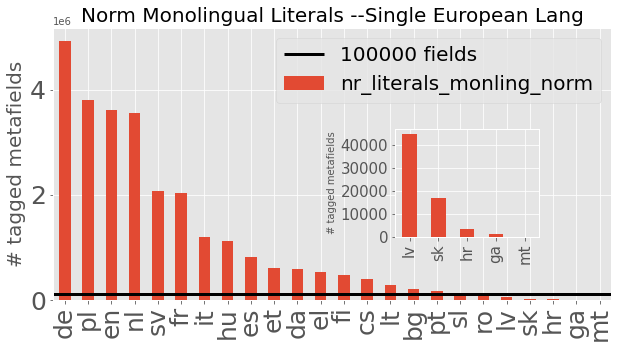

In [24]:
uf.plot_tot_bar_results(df_monoling_norm,\
                        "nr_literals_monling_norm", \
                        'Norm Monolingual Literals --Single European Lang',\
                        inset=True,
                        ins_ytick_space=10000)

In [25]:
dictlang_norm_biling_24={}
for key in lg_iso_24:
    if f"en-{lg_iso_24[key]}" in dictionary_lang_norm:
        dictlang_norm_biling_24[f"en-{lg_iso_24[key]}"]=dictionary_lang_norm[f"en-{lg_iso_24[key]}"]
    else:
        dictlang_norm_biling_24[f"en-{lg_iso_24[key]}"]=0

In [26]:
dictlang_norm_biling_24

{'en-bg': 753.0,
 'en-hr': 0,
 'en-cs': 12057.0,
 'en-da': 10825.0,
 'en-nl': 49226.0,
 'en-en': 0,
 'en-et': 1606.0,
 'en-fi': 4284.0,
 'en-fr': 58796.0,
 'en-de': 89602.0,
 'en-el': 94170.0,
 'en-hu': 112263.0,
 'en-ga': 359.0,
 'en-it': 20544.0,
 'en-lv': 23.0,
 'en-lt': 772.0,
 'en-mt': 0,
 'en-pl': 34264.0,
 'en-pt': 11886.0,
 'en-ro': 18910.0,
 'en-sk': 948.0,
 'en-sl': 4310.0,
 'en-es': 5640.0,
 'en-sv': 13422.0}

In [27]:
df_biling_norm=pd.DataFrame.from_dict(dictlang_norm_biling_24, orient = 'index')
df_biling_norm=df_biling_norm.rename(columns={0:"nr_literals_biling_norm"})

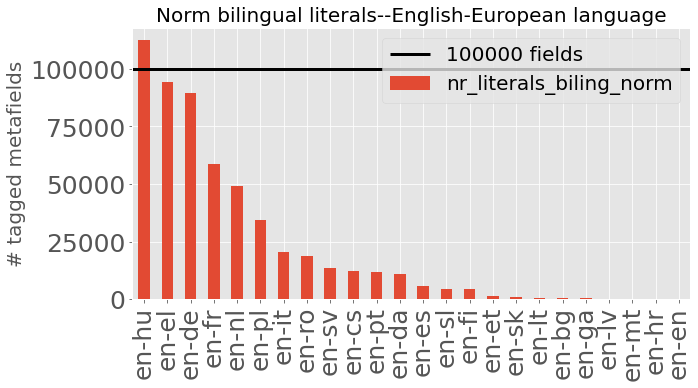

In [28]:
uf.plot_tot_bar_results(df_biling_norm,"nr_literals_biling_norm", title='Norm bilingual literals--English-European language',ins_ytick_space=100)

In [29]:
df_biling_norm.sort_values(by="nr_literals_biling_norm", ascending=False).transpose()

,en-hu,en-el,en-de,en-fr,en-nl,en-pl,en-it,en-ro,en-sv,en-cs,en-pt,en-da,en-es,en-sl,en-fi,en-et,en-sk,en-lt,en-bg,en-ga,en-lv,en-mt,en-hr,en-en
nr_literals_biling_norm,112263.0,94170.0,89602.0,58796.0,49226.0,34264.0,20544.0,18910.0,13422.0,12057.0,11886.0,10825.0,5640.0,4310.0,4284.0,1606.0,948.0,772.0,753.0,359.0,23.0,0.0,0.0,0.0


# Impact normalization on monolingual and bilingual fields

In [30]:
#Here I calculate the differnce in #literals between the two versions of the total file.
# I calculate the increment in the nr of normalized tags with respect to the previous version
new_dict_tot={}
for tag in dictionary_lang_norm:
    if tag in dictionary_lang:
            new_dict_tot[tag]  = int(dictionary_lang_norm[tag])- int(dictionary_lang[tag] )        

In [31]:
#Here I calculate the new situation with the normalized tags for the bilinguals for the 24 languages
new_dict_bili={}
for key in lg_iso_24: 
    if f"en-{lg_iso_24[key]}" in new_dict_tot:
        new_dict_bili[f"en-{lg_iso_24[key]}"]=new_dict_tot[f"en-{lg_iso_24[key]}"]
    else:
        new_dict_bili[f"en-{lg_iso_24[key]}"]=0

In [32]:
#Here I calculate the new situation with the normalized tags for monlingual
new_dict_mono={}
for tag in lg_iso_24.values():
        if tag in dictionary_lang_norm and dictionary_lang :
            new_dict_mono[tag]  = int(dictionary_lang_norm[tag])-int(dictionary_lang[tag])
        else:
            new_dict_mono[tag]=0

In [33]:
df_monoling_gain=pd.DataFrame.from_dict(new_dict_mono, orient = 'index')
df_monoling_gain=df_monoling_gain.rename(columns={0:"difference_nr_literals"})

In [34]:
import useful_functions as uf

check


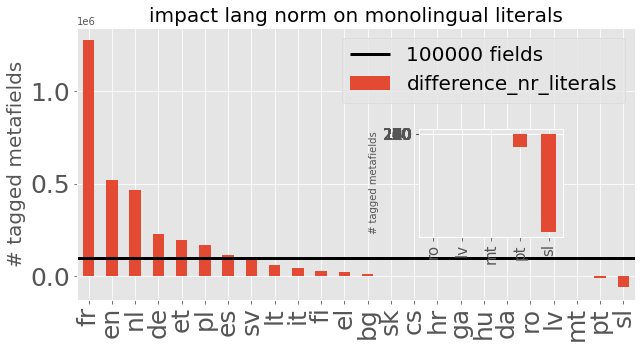

In [35]:
uf.plot_tot_bar_results(df_monoling_gain,\
                        "difference_nr_literals",\
                        title='impact lang norm on monolingual literals',\
                        ins_ytick_space=10,
                       inset=True)

In [36]:
df_monoling_gain.sort_values(by="difference_nr_literals", ascending=False)

,difference_nr_literals
fr,1272806
en,517931
nl,465044
de,228425
et,197632
pl,169714
es,114333
sv,98072
lt,63046
it,47449


In [37]:
# why big negative difference for pt and sl, where does it come from?
len(data_norm)

2090

In [38]:
data_norm.head(2)
data_norm_sl=data_norm[['CollectionId', 'sl', 'Count']].fillna(0).iloc[1:,:]

data_norm_sl.sort_values(by='sl', ascending=False)

,CollectionId,sl,Count
129,223,27995.0,53203
339,221,22373.0,27812
270,194,11867.0,36564
234,2020105,5733.0,1950
1610,2048051,3987.0,22747
...,...,...,...
699,9200232,0.0,182
698,91995,0.0,166
697,8570,0.0,1478
696,91962,0.0,105


In [39]:
data_not_norm.head(2)
data_not_norm_sl=data_not_norm[['CollectionId', 'sl','Count']].fillna(0)
data_not_norm_sl.sort_values(by='sl', ascending=False).iloc[1:,:].sort_values(by='sl', ascending=False)

,CollectionId,sl,Count
372,42,52627.0,8.0
521,3919,27995.0,173279.0
575,2022118,22373.0,316.0
524,2048707,11867.0,1.0
544,385,7107.0,4.0
...,...,...,...
2045,9200349,0.0,49.0
2046,2059201,0.0,2071.0
2047,10623,0.0,49.0
2048,2021003,0.0,1588.0


In [40]:
data_norm_sl.CollectionId[1]

'2048602'

In [41]:
153400-52627

100773

In [42]:
len(data_norm.CollectionId.dropna())

2089

In [43]:
df_biling_gain=pd.DataFrame.from_dict(new_dict_bili, orient = 'index')
df_biling_gain=df_biling_gain.rename(columns={0:"diff_nr_literals"})

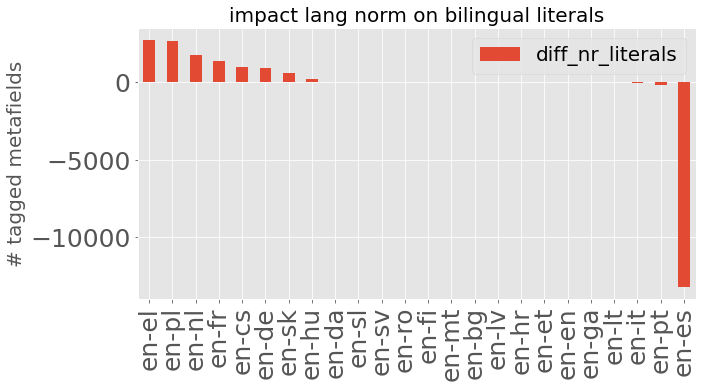

In [44]:
uf.plot_tot_bar_results(df_biling_gain,"diff_nr_literals", title='impact lang norm on bilingual literals',hline=False)

In [45]:
df_biling_gain.sort_values(by="diff_nr_literals", ascending=False)

,diff_nr_literals
en-el,2723
en-pl,2677
en-nl,1720
en-fr,1386
en-cs,990
en-de,921
en-sk,607
en-hu,196
en-da,14
en-sl,9


 # Conclusions

The conclusions are that there seem a general improvement in terms of amount of language data produced by normalization of language tags but there seem to be significan negative differences for a few languages. It could depend on the fact that the normalization is performed on a more recent data dump than the orginal, not normalized data dump but also on the deduplication procedure?